# DTSA 5509: Introduction to Machine Learning: Supervised Learning
# Final Project
## 2023 Spring 2 (Mar – May)

I study about Concrete Compressive Strength.
I want to solve how to predict Concrete compressive strength.
Concrete is the most important material in civil engineering. It is the most widely used building material. It is used to build rigid infrastructure such as roads, railways, bridges, tunnels.
Concrete compose several kind of ingredients. These ingredients include cement, blast furnace slag, fly ash, water, super plasticizer, coarse aggregate, and fine aggregate.

Data Source<br>
Data source is UCI Machine Learning Repository, University of California Irvine.
Concrete Compressive Strength Data Set.<br>
Data is downloaded URL below.<br>
 (https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)<br
                                                                            >Concrete Compressive Strength Data Set

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
#import statsmodels.api as sm

# Concrete Compressive Strength 

Data Type: multivariate 
#### Abstract:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
#### Data Characteristics:    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics:
Number of instances (observations): 1030<br>
Number of Attributes: 9<br>
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable<br>
Missing Attribute Values: None
#### Variable Information:
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

|Name -|- Data Type -|- Measurement -- Description|
|Name -|- Data Type -|- Measurement -- Description|
<br>
Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Age -- quantitative -- Day (1~365) -- Input Variable<br>
Concrete compressive strength -- quantitative -- MPa -- Output Variable<br>

In [6]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
df.columns = ['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate',
              'Fine_Aggregate','Age','Compressive_Strength']
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast_Furnace_Slag    1030 non-null   float64
 2   Fly_Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse_Aggregate      1030 non-null   float64
 6   Fine_Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
inspect_null = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

for c in df.columns:
    string_null = np.array([x in inspect_null[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

Cement 0 0
Blast_Furnace_Slag 0 0
Fly_Ash 0 0
Water 0 0
Superplasticizer 0 0
Coarse_Aggregate 0 0
Fine_Aggregate 0 0
Age 0 0
Compressive_Strength 0 0


Data Cleaning<br>
In “Readme.txt file “Missing Attribute Values” is none.
Just to be sure, I check the data, and I have confirmed there is no null data.<br>
Fortunately, I can use data without cleaning. 

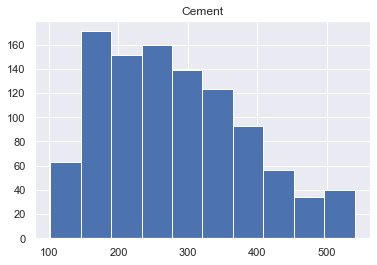

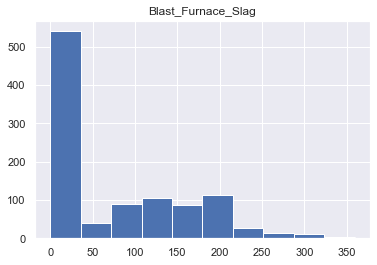

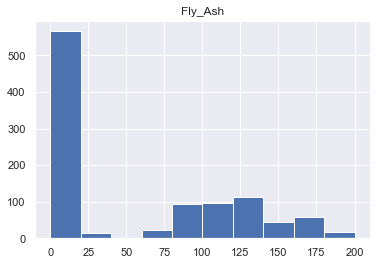

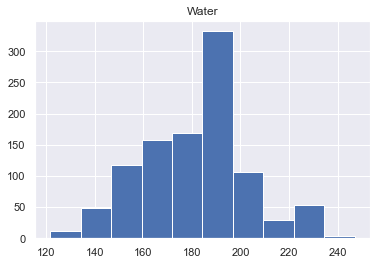

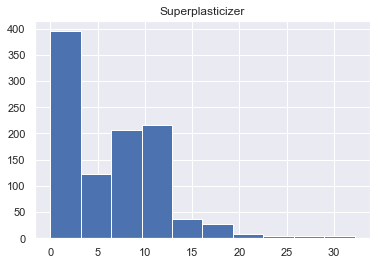

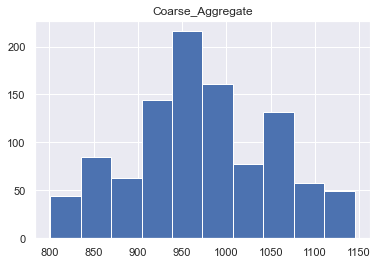

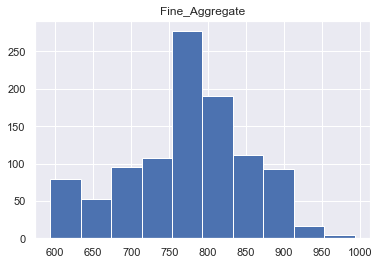

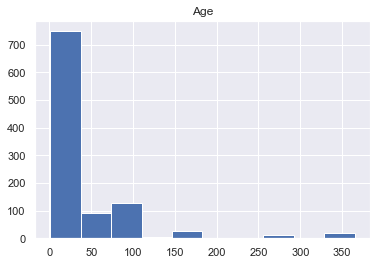

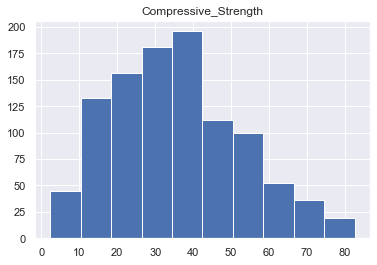

In [9]:
for c in df.columns:
    df[c].hist()
    plt.title(c)
    plt.show()

<AxesSubplot:>

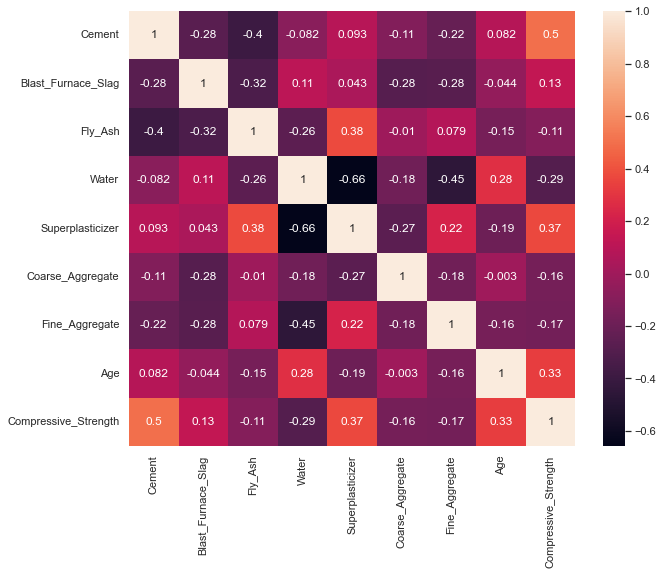

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

Heat Map<br>
This is the heat map of data.
There is no high correlation coefficient value.
The highest absolute value is 0.66.
It means that there is no collinearity between features, so I concluded that I can use every feature to make predictor. 

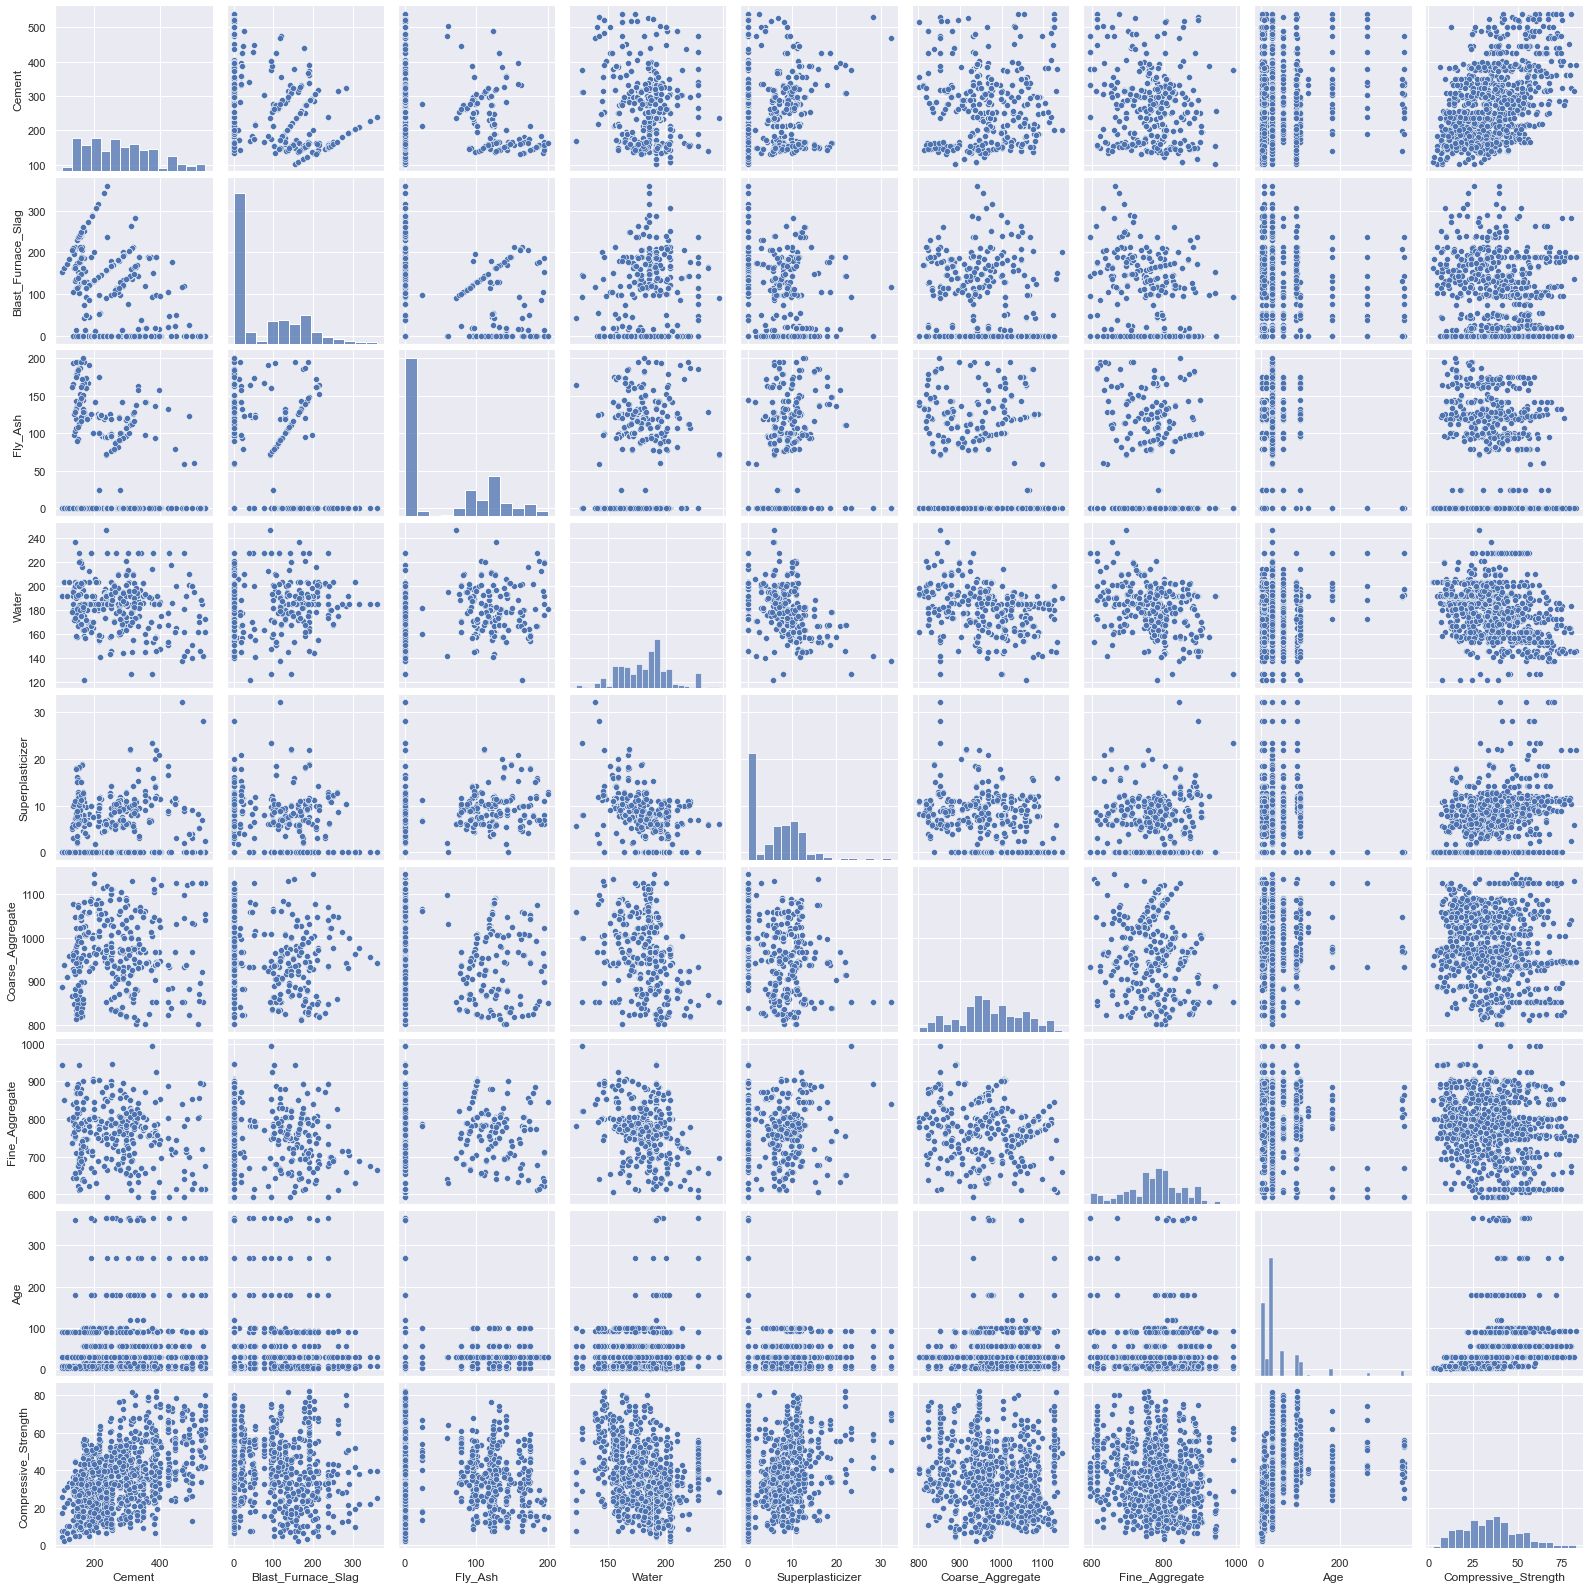

In [11]:
sns.pairplot(df)#, fontsize = 16)
plt.show()

Pair Plot<br>
As I saw in the heat map in the previous sheet, there is no strong correlation between features. 
It suggests there is no collinearity between features.<br>
At first, I concluded that it is preferable to use every feature to fit linear regression.

In [12]:
guess_predictor = df.corr()['Compressive_Strength'].drop('Compressive_Strength')
order_guess_predictor = guess_predictor.sort_values(ascending=False)
print(order_guess_predictor)

top_three = order_guess_predictor.index[0:3].tolist()
print(top_three)

Cement                0.497833
Superplasticizer      0.366102
Age                   0.328877
Blast_Furnace_Slag    0.134824
Fly_Ash              -0.105753
Coarse_Aggregate     -0.164928
Fine_Aggregate       -0.167249
Water                -0.289613
Name: Compressive_Strength, dtype: float64
['Cement', 'Superplasticizer', 'Age']


Machine Learning approach<br>
They say that concrete strength depends on ratio of ingredients and age. It is very important to predict strength from these features.
In this time, I consider about concrete compressive strength. 
It is said that the concrete compressive strength is a highly nonlinear function of age and ingredients. 
First, I tried to adopt linear regression models. Next, I consider to adopt Random Forest models that are kind of nonparametric models to predict compressive strength.

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)
print(len(df_train), len(df_test))

824 206


Split data<br>
Data is split training data and test data. The ratio is 80 : 20<br>
Number of train data is 824, and number of test data is 206.<br>

In [14]:
model = smf.ols(formula='Compressive_Strength ~ Cement + Blast_Furnace_Slag + Water + Age + Superplasticizer \
                         + Fly_Ash + Coarse_Aggregate + Fine_Aggregate', data=df_train).fit()
print(model.summary())

y_train_pred = model.predict(df_train)
y_test_pred = model.predict(df_test)
rmse_train = np.sqrt(np.mean((df_train['Compressive_Strength'] - y_train_pred) ** 2))
print('Root Mean Squared Error(RMSE) train : ', rmse_train)
rmse_test = np.sqrt(np.mean((df_test['Compressive_Strength'] - y_test_pred) ** 2))
print('Root Mean Squared Error(RMSE) test  : ', rmse_test)

                             OLS Regression Results                             
Dep. Variable:     Compressive_Strength   R-squared:                       0.609
Model:                              OLS   Adj. R-squared:                  0.605
Method:                   Least Squares   F-statistic:                     158.7
Date:                  Mon, 01 May 2023   Prob (F-statistic):          1.57e-160
Time:                          20:07:27   Log-Likelihood:                -3107.1
No. Observations:                   824   AIC:                             6232.
Df Residuals:                       815   BIC:                             6275.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

The objective variable is “compressive strength".<br>
P value of two feature "Coarse_Aggregate" and "Fine_Aggregate" are large. These are larger than 0.05.<br>
I delete these two features, and fit linear regression model again.

In [15]:
model2 = smf.ols(formula='Compressive_Strength ~ Cement + Blast_Furnace_Slag + Water + Age + Superplasticizer \
                         + Fly_Ash', data=df_train).fit()
print(model2.summary())

y_train_pred = model2.predict(df_train)
y_test_pred = model2.predict(df_test)
rmse_train = np.sqrt(np.mean((df_train['Compressive_Strength'] - y_train_pred) ** 2))
print('Root Mean Squared Error(RMSE) train : ', rmse_train)
rmse_test = np.sqrt(np.mean((df_test['Compressive_Strength'] - y_test_pred) ** 2))
print('Root Mean Squared Error(RMSE) test  : ', rmse_test)

                             OLS Regression Results                             
Dep. Variable:     Compressive_Strength   R-squared:                       0.607
Model:                              OLS   Adj. R-squared:                  0.604
Method:                   Least Squares   F-statistic:                     210.3
Date:                  Mon, 01 May 2023   Prob (F-statistic):          6.65e-162
Time:                          20:07:27   Log-Likelihood:                -3109.3
No. Observations:                   824   AIC:                             6233.
Df Residuals:                       817   BIC:                             6266.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

All P value is zero or smaller than 0.05. But R-squared value about 0.7, it is not high.

Root Mean Squared Error(RMSE) train :  10.532961665148903
Root Mean Squared Error(RMSE) test  :  9.752456640426615
correlation coefficients train :  0.7790720395646025
correlation coefficients test  :  0.7993738774365416
R^2 train :  0.6069532428313495
R^2 test  :  0.6388911080848501


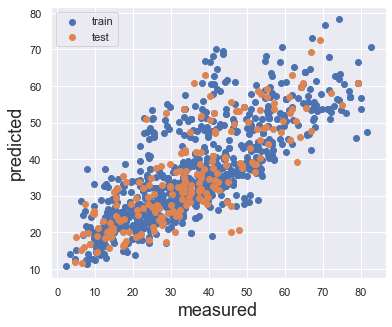

In [16]:
fig = plt.figure(figsize=(6,5))
plt.scatter(df_train['Compressive_Strength'], y_train_pred)
plt.scatter(df_test['Compressive_Strength'], y_test_pred)
plt.xlabel('measured', fontsize = 18); plt.ylabel('predicted', fontsize = 18)
plt.legend(['train', 'test'])

rmse_train = np.sqrt(np.mean((df_train['Compressive_Strength'] - y_train_pred) ** 2))
print('Root Mean Squared Error(RMSE) train : ', rmse_train)
rmse_test = np.sqrt(np.mean((df_test['Compressive_Strength'] - y_test_pred) ** 2))
print('Root Mean Squared Error(RMSE) test  : ', rmse_test)

print('correlation coefficients train : ', np.corrcoef(df_train['Compressive_Strength'], y_train_pred)[0,1])
print('correlation coefficients test  : ', np.corrcoef(df_test['Compressive_Strength'], y_test_pred)[0,1])

from sklearn.metrics import r2_score
print('R^2 train : ', r2_score(df_train['Compressive_Strength'], y_train_pred))
print('R^2 test  : ', r2_score(df_test['Compressive_Strength'], y_test_pred))

This graph shows measured value and predicted value of Compressive Strength, using linear regression models.

About train data, root mean squared is large. And correlation coefficients and r squared value is small. These mean the predicted value from the linear regression model has considerable error.<br>
I use test data to accuracy of predictor. Also test data, root mean squared is small, and correlation coefficients and r squared value is small.

In [17]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV

X_train = df_train.drop(columns=['Compressive_Strength'])
y_train = df_train['Compressive_Strength']

parameters = {'n_estimators': [10, 20, 30, 50, 100],
              'max_depth':    [10, 20, 30, 40, 50, None] }

gridsearch = GridSearchCV(estimator  = RFR(random_state=0),
                          param_grid = parameters)
gridsearch.fit(X_train, y_train)

print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))

Best params: {'max_depth': 20, 'n_estimators': 50}
Best Score: 0.8958964328298944


I use Random Forest to make predictor.<br>
Grid Search methods gives proper parameters. Max depth is 30, and estimaters is 100.

Root Mean Squared Error(RMSE) train :  2.0565232186864963
Root Mean Squared Error(RMSE) test :  4.468964237846988
correlation coefficients train :  0.9930316257930957
correlation coefficients test  :  0.9614347315776602
R^2 train :  0.9850165975504989
R^2 test  :  0.9241729980846112


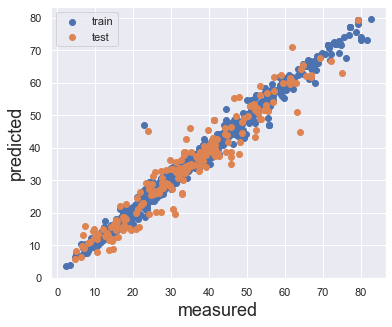

In [18]:
rg_grid = RFR(n_estimators = gridsearch.best_params_['n_estimators'],
              max_depth    = gridsearch.best_params_['max_depth'],
              random_state=0)
rg_grid.fit(X_train, y_train)

X_test = df_test.drop(columns=['Compressive_Strength'])
y_test = df_test['Compressive_Strength']

y_train_rf_pred = rg_grid.predict(X_train)
y_test_rf_pred = rg_grid.predict(X_test)

rmse_train = np.sqrt(np.mean((y_train - y_train_rf_pred) ** 2))
print('Root Mean Squared Error(RMSE) train : ', rmse_train)
rmse_test = np.sqrt(np.mean((y_test - y_test_rf_pred) ** 2))
print('Root Mean Squared Error(RMSE) test : ', rmse_test)

fig = plt.figure(figsize=(6,5))
plt.scatter(y_train, y_train_rf_pred)
plt.scatter(y_test, y_test_rf_pred)
plt.xlabel('measured', fontsize = 18); plt.ylabel('predicted', fontsize = 18)
plt.legend(['train', 'test'])
np.corrcoef(y_train, y_train_rf_pred)

print('correlation coefficients train : ', np.corrcoef(y_train, y_train_rf_pred)[0,1])
print('correlation coefficients test  : ', np.corrcoef(y_test, y_test_rf_pred)[0,1])

print('R^2 train : ', r2_score(y_train, y_train_rf_pred))
print('R^2 test  : ', r2_score(y_test, y_test_rf_pred))

This graph shows relationship between measured value and predicted value random forest regressior.<br>
Random forest model gives accuracy prediction result.  

It gives small root mean squared. And correlation coefficients and r squared value is large compared with previous linear regression models.

Conclusion

Random Forest predict concrete compressive strength based on ingredients and age properly.
Random Forest is suitable model for this problem than linear regression models, and I will use Random Forest models to predict concrete compressive strength.